# Import Lybs

In [5]:
import pandas as pd
import numpy as np

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)



# Data Import

In [7]:
url='https://raw.githubusercontent.com/franciscofijamo/house_sales_analytcs/main/kc_house_data.csv'
df = pd.read_csv(url)

# Data Description

In [8]:
#df.columns
#df.head()
print(f'Houses to buy:  {df.shape[0]} Features: {df.shape[1]}')
# df['bedrooms'].max()

Houses to buy:  21613 Features: 21


In [9]:
# sort values by bedrooms
# ascending= False >> maior ao menor
df[['id', 'price', 'bedrooms']].sort_values('bedrooms', ascending= False).head()

,id,price,bedrooms
15870,2402100895,640000.00,33
8757,1773100755,520000.00,11
15161,5566100170,650000.00,10
13314,627300145,1148000.00,10
19254,8812401450,660000.00,10



### **How many houses available to buy?**
R >> Houses to buy:  21613
### **How many attributes houses have?**
R >> Features: 21
### **Whats is the attributes?**
R >> 'id', 'date','price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'
### **Which house has the most rooms?**
R >> id: 2402100895	price : 640000.0	bedrooms: 33

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


# Datatype transform

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
# convert date object to formast date
df['date'] = pd.to_datetime(df['date'])
# convert float to int
df['bathrooms'] = df['bathrooms'].astype(int)
# list convert
"""
df['bathrooms'] = df['bathrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(str)
df['bathrooms'] = df['bathrooms'].astype(int64)
df['bathrooms'] = df['bathrooms'].astype(float)
"""

"\ndf['bathrooms'] = df['bathrooms'].astype(int)\ndf['bathrooms'] = df['bathrooms'].astype(str)\ndf['bathrooms'] = df['bathrooms'].astype(int64)\ndf['bathrooms'] = df['bathrooms'].astype(float)\n"

# Feature Engineering

### Create new columns


In [13]:
# create new columns/feature
df['colunanova'] = 'novacoluna'
df['uma_data'] = pd.to_datetime('2020-02-02')

In [14]:
df[['id', 'colunanova', 'uma_data']]

,id,colunanova,uma_data
0,7129300520,novacoluna,2020-02-02
1,6414100192,novacoluna,2020-02-02
2,5631500400,novacoluna,2020-02-02
3,2487200875,novacoluna,2020-02-02
4,1954400510,novacoluna,2020-02-02
...,...,...,...
21608,263000018,novacoluna,2020-02-02
21609,6600060120,novacoluna,2020-02-02
21610,1523300141,novacoluna,2020-02-02
21611,291310100,novacoluna,2020-02-02


### Drop columns

In [15]:
# drop vars
# axis = 1 - delete column, axis = 0, delete row
# drop([x,c,v], axis = 1) - delete more than 1 column


In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'colunanova', 'uma_data'],
      dtype='object')

In [17]:
# or create list of columns - Best pratice
cols = ['colunanova', 'uma_data']
df = df.drop(cols, axis = 1)

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Select Columns and Rows by Index use ***iloc*** and ***loc***

In [19]:
# iloc - index localization
df.iloc[0:10, 0:4]

,id,date,price,bedrooms
0,7129300520,2014-10-13,221900.00,3
1,6414100192,2014-12-09,538000.00,3
2,5631500400,2015-02-25,180000.00,2
3,2487200875,2014-12-09,604000.00,4
4,1954400510,2015-02-18,510000.00,3
5,7237550310,2014-05-12,1225000.00,4
6,1321400060,2014-06-27,257500.00,3
7,2008000270,2015-01-15,291850.00,3
8,2414600126,2015-04-15,229500.00,3
9,3793500160,2015-03-12,323000.00,3


In [20]:
# loc - localization
df.loc[0:10, 'price']


0     221900.00
1     538000.00
2     180000.00
3     604000.00
4     510000.00
5    1225000.00
6     257500.00
7     291850.00
8     229500.00
9     323000.00
10    662500.00
Name: price, dtype: float64

In [21]:
df.shape

(21613, 21)

### Select columns by ***boolean method***

In [22]:
# create a list with True and False, 
# True - Select column, False - No select
# The numer of True and False need to be a nr of all columns(21)

columns = [
            True, 
            True,
            True,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False,
            False
           
]

In [23]:
df.loc[0:11,columns]

,id,date,price
0,7129300520,2014-10-13,221900.00
1,6414100192,2014-12-09,538000.00
2,5631500400,2015-02-25,180000.00
3,2487200875,2014-12-09,604000.00
4,1954400510,2015-02-18,510000.00
5,7237550310,2014-05-12,1225000.00
6,1321400060,2014-06-27,257500.00
7,2008000270,2015-01-15,291850.00
8,2414600126,2015-04-15,229500.00
9,3793500160,2015-03-12,323000.00


### Questions 2.0

# Qustions

### What is the date of the oldest property?

In [24]:
# df['date'].sort_values()
# or
df.sort_values('date', ascending= True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.00,3,2,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,2340,35100
9596,472000620,2014-05-02,790000.00,3,2,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,2380,4750
9587,1024069009,2014-05-02,675000.00,5,2,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351
20602,7853361370,2014-05-02,555000.00,4,2,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,2380,5000
11577,5056500260,2014-05-02,440000.00,4,2,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.00,3,1,1170,7320,1.00,0,0,3,7,1170,0,1962,0,98188,47.47,-122.28,2040,7320
928,8730000270,2015-05-14,359000.00,2,2,1370,1140,2.00,0,0,3,8,1080,290,2009,0,98133,47.71,-122.34,1370,1090
5637,7923600250,2015-05-15,450000.00,5,2,1870,7344,1.50,0,0,3,7,1870,0,1960,0,98007,47.60,-122.14,1870,7650
13053,5101400871,2015-05-24,445500.00,2,1,1390,6670,1.00,0,0,3,6,720,670,1941,0,98115,47.69,-122.31,920,6380


### How many properties have more or more floors

In [25]:
# identify unique values
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [26]:
# Select size of floors == 3.5
df[df['floors']== 3.5].shape
# print conditions and, select columns in one row
#df[df['floors']== 3.5][['id', 'floors']]

(8, 21)

### Create low and high standard real estate grouping according to price ( USD540.000 - High level >USD540.000 - low level )

In [27]:
# create column
df['level'] = 'standard'
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'level'],
      dtype='object')

In [28]:
# loc todas as linhas da coluna nessa condicao df['price'] >540000, retorna o level e iguala a alto nivel
df.loc[df['price'] >540000, 'level'] = 'high_level'

In [29]:
# low level
df.loc[df['price'] < 540000, 'level'] = 'low_level'

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,low_level
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,low_level
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,low_level
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,high_level
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,low_level


### create an ordered report sorting by: (id, date available property, number of bedrooms, total_size, price, property classification(point 3)

In [31]:
# agregar e ordenar por preco do maior ao menor
report = df[['id', 'date','price','bedrooms', 'sqft_lot', 'level']].sort_values('price', ascending = False)

In [32]:
report.head()

,id,date,price,bedrooms,sqft_lot,level
7252,6762700020,2014-10-13,7700000.00,6,27600,high_level
3914,9808700762,2014-06-11,7062500.00,5,37325,high_level
9254,9208900037,2014-09-19,6885000.00,6,31374,high_level
4411,2470100110,2014-08-04,5570000.00,5,35069,high_level
1448,8907500070,2015-04-13,5350000.00,5,23985,high_level


In [33]:
# saving dataset
# index = False to reset index 

report.to_csv('report.csv', index = False)

### Drow map with plotly


In [34]:
# !pip install plotly

In [35]:
import plotly.express as px

In [36]:
df_map = df[['id', 'lat', 'long', 'price']]

In [37]:
df_map

,id,lat,long,price
0,7129300520,47.51,-122.26,221900.00
1,6414100192,47.72,-122.32,538000.00
2,5631500400,47.74,-122.23,180000.00
3,2487200875,47.52,-122.39,604000.00
4,1954400510,47.62,-122.05,510000.00
...,...,...,...,...
21608,263000018,47.70,-122.35,360000.00
21609,6600060120,47.51,-122.36,400000.00
21610,1523300141,47.59,-122.30,402101.00
21611,291310100,47.53,-122.07,400000.00


In [38]:
# using scatter_mapbox( data, lat= , long=, hover_name = , houver_data= , color_discrete_sequence)

# todos campos recebem colunas do df_map com aspas simples
# houver_data  recebe uma lista por obrigacao  ['price'] 

df_map = df[['id', 'lat', 'long', 'price']]

map = px.scatter_mapbox(df_map, lat = 'lat' , lon = 'long',
               hover_name = 'id',
               hover_data = ['price'],
               color_discrete_sequence = ['fuchsia'],
               zoom = 3,
               height = 300)

map.update_layout(mapbox_style = 'open-street-map')
map.update_layout(height = 600, margin= {'r':0, 't':0, 'l':0, 'b':0})

map.show()

In [39]:
# saving map

map.write_html('mapa_houses.html')

### Criar coluna "house_age"
### 1. Se o valor da coluna date for maior que 2014-01-01 = new_house, se for menor, old_house. 

In [40]:
# crirar nova coluna 
df['old_house'] = 'old_house'

In [41]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'level', 'old_house'],
      dtype='object')

In [42]:
df.loc[df['date'] >'2014-01-01', 'old_house'] = 'new_house'

In [43]:
df.sort_values('date', ascending= False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,old_house
16594,9106000005,2015-05-27,1310000.00,4,2,3750,5000,2.00,0,0,5,8,2440,1310,1924,0,98115,47.67,-122.30,2170,4590,high_level,new_house
13053,5101400871,2015-05-24,445500.00,2,1,1390,6670,1.00,0,0,3,6,720,670,1941,0,98115,47.69,-122.31,920,6380,low_level,new_house
5637,7923600250,2015-05-15,450000.00,5,2,1870,7344,1.50,0,0,3,7,1870,0,1960,0,98007,47.60,-122.14,1870,7650,low_level,new_house
928,8730000270,2015-05-14,359000.00,2,2,1370,1140,2.00,0,0,3,8,1080,290,2009,0,98133,47.71,-122.34,1370,1090,low_level,new_house
6197,9178601660,2015-05-14,1695000.00,5,3,3320,5354,2.00,0,0,3,9,3320,0,2004,0,98103,47.65,-122.33,2330,4040,high_level,new_house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20559,3438501320,2014-05-02,295000.00,2,2,1630,1368,2.00,0,0,3,7,1280,350,2009,0,98106,47.55,-122.36,1590,2306,low_level,new_house
7323,2202500290,2014-05-02,435000.00,4,1,1450,8800,1.00,0,0,4,7,1450,0,1954,0,98006,47.57,-122.14,1260,8942,low_level,new_house
12366,587550340,2014-05-02,604000.00,3,2,3240,33151,2.00,0,2,3,10,3240,0,1995,0,98023,47.33,-122.38,4050,24967,high_level,new_house
9587,1024069009,2014-05-02,675000.00,5,2,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351,high_level,new_house


### 2.0 Criar uma nova coluna chamada "dormitory_type", se o numero de bedrooms 
### ==1  - 'studio'
### ==2  - 'apartament'
### >2 - 'house'

In [44]:
df['dormitory_type'] = ""

In [45]:
df.loc[df['bathrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bathrooms'] == 2, 'dormitory_type'] = 'apartment'
df.loc[df['bathrooms'] > 2, 'dormitory_type'] = 'house'

In [46]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,old_house,dormitory_type
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,low_level,new_house,studio
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,low_level,new_house,apartment
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,low_level,new_house,studio
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,high_level,new_house,house
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,low_level,new_house,apartment
5,7237550310,2014-05-12,1225000.00,4,4,5420,101930,1.00,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930,high_level,new_house,house
6,1321400060,2014-06-27,257500.00,3,2,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,low_level,new_house,apartment
7,2008000270,2015-01-15,291850.00,3,1,1060,9711,1.00,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711,low_level,new_house,studio
8,2414600126,2015-04-15,229500.00,3,1,1780,7470,1.00,0,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113,low_level,new_house,studio
9,3793500160,2015-03-12,323000.00,3,2,1890,6560,2.00,0,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570,low_level,new_house,apartment


### 3.0 Criar uma coluna de nome "condition_type", 
### Seo valor da coluna condition for <= 2 - bad
### Seo valor da coluna condition for == 3 | 4 - regular 
### Seo valor da coluna condition for == 5 - good

In [47]:
df['condition_type'] = ""

In [48]:
df.loc[df['condition'] <= 2, 'condition_type'] = 'bad'
df.loc[df['condition'] == 3, 'condition_type'] = 'regular'
df.loc[df['condition'] == 4, 'condition_type'] = 'regular'
df.loc[df['condition'] == 5, 'condition_type'] = 'good'

In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,old_house,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,low_level,new_house,studio,regular
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,low_level,new_house,apartment,regular
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,low_level,new_house,studio,regular
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,high_level,new_house,house,good
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,low_level,new_house,apartment,regular


### drop sqft_lot15, sqft_living15

In [50]:
df = df.drop(['sqft_living15', 'sqft_lot15'], axis = 1)

In [51]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'level', 'old_house', 'dormitory_type',
       'condition_type'],
      dtype='object')

## Modificar as featuers yr_built, e yr_renovated para data.

In [52]:
df['yr_built'] = pd.to_datetime(df['yr_built'])
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])


In [53]:
df[['yr_built', 'yr_renovated']].dtypes

yr_built        datetime64[ns]
yr_renovated    datetime64[ns]
dtype: object

### Quantos imoveis tem 2 andares

In [54]:
df[df['floors']==2].shape[0]

8241

### Quantos imoveis estao como 'regular'

In [55]:
df[df['condition_type'] == 'regular'].shape[0]

19710

### Quantos tem a categoria de 'regular' e possuem vista ao mar

In [56]:
df.loc[(df['condition_type'] == 'regular') & (df['waterfront'] == 0)].shape[0]

19569

In [57]:
df.loc[df['condition_type']== 'studio'].head()
#df[['condition_type', 'price']].sort_values('price', ascending = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,old_house,dormitory_type,condition_type


In [58]:
#imovel_max_andares = max(data['floors'])
#print(data[['id']].loc[data['floors'] == imovel_max_andares].count())

# Questions 2.0

In [59]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,old_house,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.51,-122.26,low_level,new_house,studio,regular
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.72,-122.32,low_level,new_house,apartment,regular
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,1970-01-01 00:00:00.000000000,98028,47.74,-122.23,low_level,new_house,studio,regular
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,5,7,1050,910,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,47.52,-122.39,high_level,new_house,house,good
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,3,8,1680,0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,47.62,-122.05,low_level,new_house,apartment,regular


## Using Groupby

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  int64         
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  datetime64[ns]
 15  yr

In [61]:
 # quantos imoveis existem por numero de quartos
 df[['id', 'bedrooms']].groupby('bedrooms').size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

In [62]:
 # numero de imoveis por ano de contrucao
df[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1970-01-01 00:00:00.000001900,87
1970-01-01 00:00:00.000001901,29
1970-01-01 00:00:00.000001902,27
1970-01-01 00:00:00.000001903,46
1970-01-01 00:00:00.000001904,45
...,...
1970-01-01 00:00:00.000002011,130
1970-01-01 00:00:00.000002012,170
1970-01-01 00:00:00.000002013,201


In [63]:
# menor nr de quartos por ano de contrucao
df[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1970-01-01 00:00:00.000001900,1
1970-01-01 00:00:00.000001901,2
1970-01-01 00:00:00.000001902,2
1970-01-01 00:00:00.000001903,1
1970-01-01 00:00:00.000001904,2
...,...
1970-01-01 00:00:00.000002011,1
1970-01-01 00:00:00.000002012,2
1970-01-01 00:00:00.000002013,2


In [64]:
# preco de compra mais alto por numero de quarto

df[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.00
1,1247000.00
2,3278000.00
3,3800000.00
4,4489000.00
5,7062500.00
6,7700000.00
7,3200000.00
8,3300000.00


In [65]:
 # Qual e a soma de todos os precos de compra, por numero de quartos

 df[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


In [66]:
# Qual a soma de todos os precos por quarto e caas de banho
# assim e necessario colocar a lista de filtros sempre quando for mais de 1 no groupby

df[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms              
0        0            3907600.00
         1             516000.00
         2             899950.00
1        0            7872450.00
         1           50831584.00
         2            4506900.00
2        0            8897351.00
         1          807539672.00
         2          275503729.00
         3           15847850.00
3        0            4984201.00
         1         1745324737.00
         2         2391779304.00
         3          406716547.00
         4           31459150.00
4        0             975000.00
         1          591805752.00
         2         2541466607.00
         3         1010678439.00
         4          193759700.00
         5           34271530.00
5        1          108817857.00
         2          449050266.00
         3          457153410.00
         4          173720303.00
         5           47278600.00
         6           23325890.00
6        1           14145400.00
         2           64810920.00
         3           63665144.00
         4           51863649.00
         5            8991500.00
         6            6480000.00
         7            6885000.00
         8            7700000.00
7        1            1176000.00
         2            4848000.00
         3           10747160.00
         4           14513857.00
         5            1780000.00
         6             800000.00
         8            2280000.00
8        2            3370000.00
         3            4156000.00
         4            4200000.00
         5             490000.00
         6            2150000.00
9        3            1634000.00
         4            3279999.00
         7             450000.00
10       2             650000.00
         3             660000.00
         5            1148000.00
11       3             520000.00
33       1             640000.00

## Como ler:
Para as casas com com 0 casas de banho, temos com 0, 0.75, 1, 1,5, 2 casas de banho, com os respectivos precos...
Para casas com Quartos, temos com 2,3,5, casas de banho, e seus respectivos precos, assim sucessivamente...

In [67]:
# Qual e o tamanho medio das salas dos imoveis por ano de contrucao

df[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1970-01-01 00:00:00.000001900,1732.01
1970-01-01 00:00:00.000001901,1763.62
1970-01-01 00:00:00.000001902,1919.63
1970-01-01 00:00:00.000001903,1507.74
1970-01-01 00:00:00.000001904,1603.18
...,...
1970-01-01 00:00:00.000002011,2313.68
1970-01-01 00:00:00.000002012,2378.74
1970-01-01 00:00:00.000002013,2636.59


In [68]:
# Qual e o tamanho mediano das salas dos imoveis por ano de contrucao
df[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1970-01-01 00:00:00.000001900,1540.00
1970-01-01 00:00:00.000001901,1610.00
1970-01-01 00:00:00.000001902,1600.00
1970-01-01 00:00:00.000001903,1505.00
1970-01-01 00:00:00.000001904,1280.00
...,...
1970-01-01 00:00:00.000002011,2270.00
1970-01-01 00:00:00.000002012,2237.50
1970-01-01 00:00:00.000002013,2580.00


In [69]:
# Qual e o desvio padao das salas dos imoveis por ano de contrucao

df[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1970-01-01 00:00:00.000001900,732.94
1970-01-01 00:00:00.000001901,668.23
1970-01-01 00:00:00.000001902,878.66
1970-01-01 00:00:00.000001903,469.72
1970-01-01 00:00:00.000001904,1076.87
...,...
1970-01-01 00:00:00.000002011,804.86
1970-01-01 00:00:00.000002012,771.43
1970-01-01 00:00:00.000002013,883.50


In [70]:
# Como e o crescimento medio de precos de compras de imoveis por ano, dia, semana do ano?

# 1. cresciemnto total de preco de compras de imovesi por ano
## eixo X - Ano
## eixo Y - Soma dos precos
### Grafico de barras


In [71]:
# Criar coluna Ano, extraida da coluna date

df['year'] = pd.to_datetime(df['date']).dt.year

In [72]:
df.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                  int64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built          datetime64[ns]
yr_renovated      datetime64[ns]
zipcode                    int64
lat                      float64
long                     float64
level                     object
old_house                 object
dormitory_type            object
condition_type            object
year                       int64
dtype: object

In [73]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,old_house,dormitory_type,condition_type,year
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1.00,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.51,-122.26,low_level,new_house,studio,regular,2014
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2.00,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.72,-122.32,low_level,new_house,apartment,regular,2014
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1.00,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,1970-01-01 00:00:00.000000000,98028,47.74,-122.23,low_level,new_house,studio,regular,2015
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1.00,0,0,5,7,1050,910,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,47.52,-122.39,high_level,new_house,house,good,2014
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1.00,0,0,3,8,1680,0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,47.62,-122.05,low_level,new_house,apartment,regular,2015


In [74]:
df[['price', 'year']].groupby('year').sum()
# colocar reset.index() para nao deixar que year seja nome de linha
by_year = df[['price', 'year']].groupby('year').sum().reset_index()
by_year

,year,price
0,2014,7889841842.00
1,2015,3783083166.00


In [75]:
import matplotlib.pyplot as plt


<BarContainer object of 2 artists>

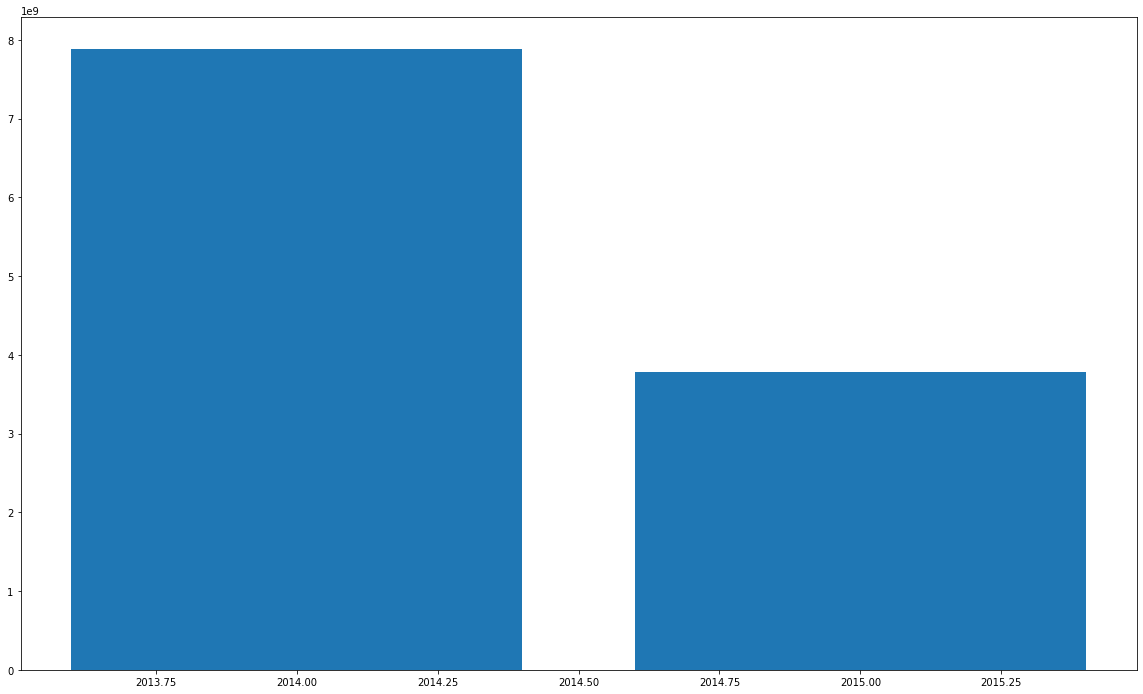

In [76]:
# Por ano
plt.figure(figsize=(20,12))
plt.bar(by_year.year, by_year.price)

In [77]:
# Criar coluna Ano, extraida da coluna date

df['day'] = pd.to_datetime(df['date']) 

# colocar reset.index() para nao deixar que year seja nome de linha
by_day = df[['price', 'day']].groupby('day').mean().reset_index()
by_day


,day,price
0,2014-05-02,526251.49
1,2014-05-03,466970.00
2,2014-05-04,576690.00
3,2014-05-05,580938.61
4,2014-05-06,534047.90
...,...,...
367,2015-05-13,511623.87
368,2015-05-14,603436.27
369,2015-05-15,450000.00
370,2015-05-24,445500.00


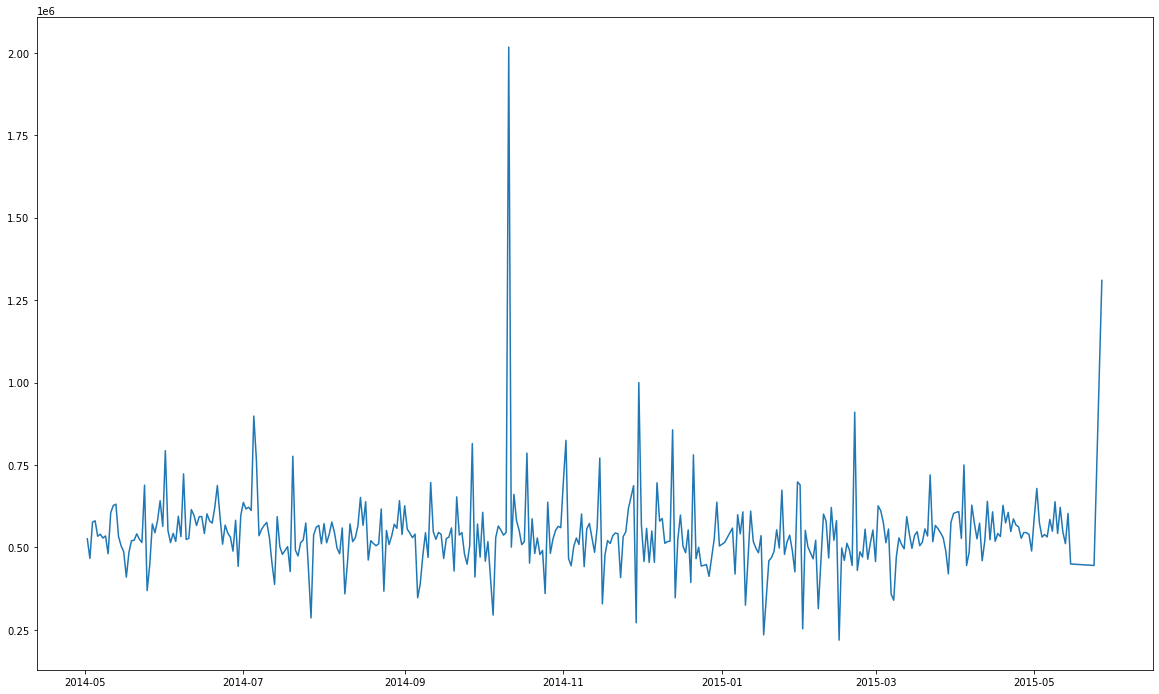

In [78]:
# por dia 
plt.figure(figsize=(20,12))
plt.plot(by_day.day, by_day.price)

In [79]:
# Por semana do ano
#%Y-%W  - onde W e semana comencando na segunda
#%Y-%U  - onde U e semana comencando no domingo
#%Y-%M - onde M e o mes do ano  
df['year_week'] = pd.to_datetime(df['date']).dt.strftime( '%Y-%U')

# colocar reset.index() para nao deixar que year seja nome de linha
by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
#by_day


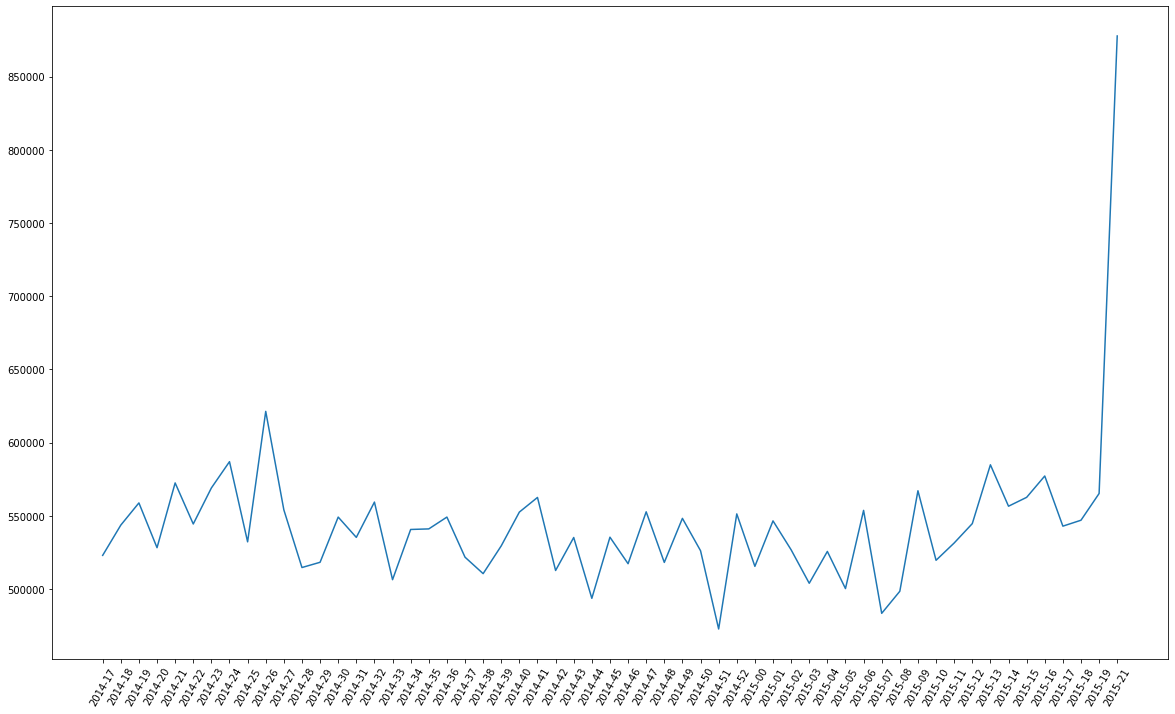

In [80]:
# por semana 
plt.figure(figsize=(20,12))
plt.plot(by_year_week.year_week , by_year_week.price)

# rotacionando
plt.xticks(rotation= 60);

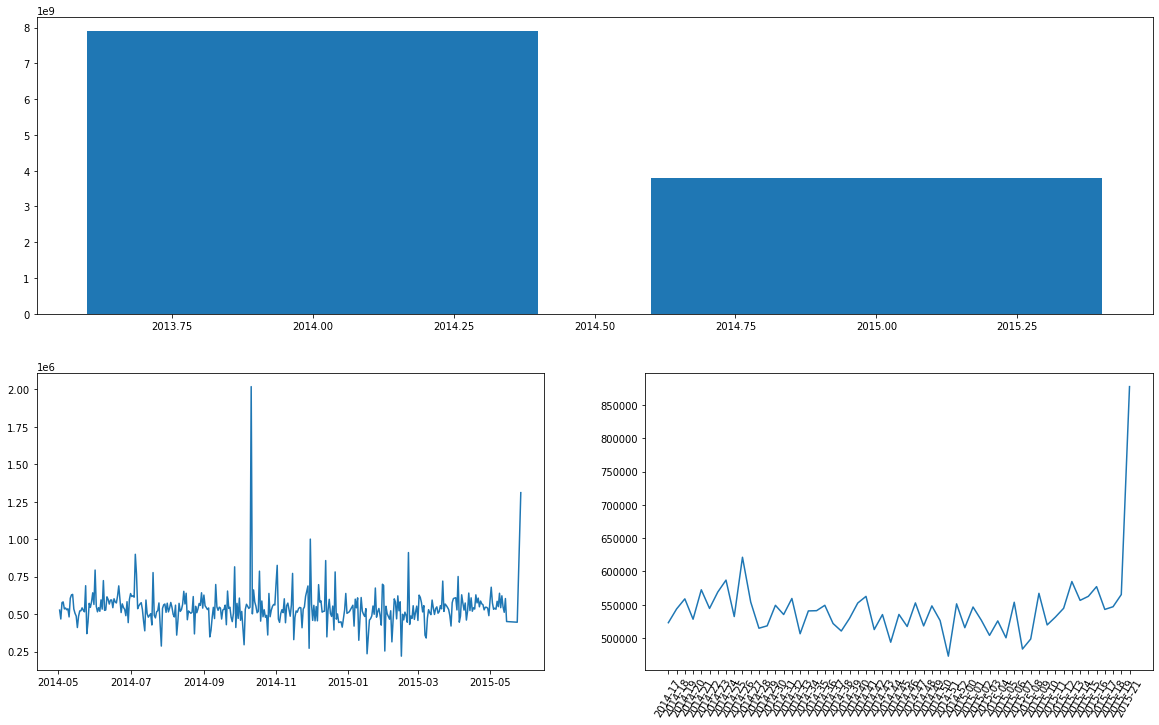

In [81]:
from matplotlib import gridspec

# Agrupando os  grafico em um dash
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec (ncols=2, nrows=2, figure=fig )


ax1 = fig.add_subplot(specs[0, :]) # first row
ax2 = fig.add_subplot(specs[1, 0]) # second row, first column
ax3 = fig.add_subplot(specs[1, 1]) # thesecondrty row, second column


# Por ano
ax1.bar(by_year.year, by_year.price)



# por dia 
ax2.plot(by_day.day, by_day.price)

# por semana 
ax3.plot(by_year_week.year_week , by_year_week.price)
plt.xticks(rotation= 60);

In [82]:
house = df[['id', 'lat', 'long', 'price']]

map = px.scatter_mapbox(house,
                        lat = 'lat',
                        lon = 'long',
                        size = 'price',
                        #color_continuos_scale = px.colors.cyclical.IceFire,
                        size_max = 15,
                        zoom =10 )


map.update_layout(mapbox_style = 'open-street-map')
map.update_layout(height = 600, margin= {'r':0, 't':0, 'l':0, 'b':0})

map.show()

# Questions 3

In [83]:
import pandas as pd

In [84]:
url='https://raw.githubusercontent.com/franciscofijamo/house_sales_analytcs/main/kc_house_data.csv'
df = pd.read_csv(url)

In [85]:
# Quantidade de imoveis por niveis usando o programacao procedual

# filtrar precos entre 0 e 321.950
df['nivel'] = ""

df['nivel'] =  df.loc[(df['price'] >=0)  &  (df['price'] < 321950), 'nivel'] =  'nivel_0'
df['nivel'] =  df.loc[(df['price'] >=321950)  &  (df['price'] < 450000), 'nivel'] =  'nivel_1'
df['nivel'] =  df.loc[(df['price'] >=540000)  &  (df['price'] < 645000), 'nivel'] =  'nivel_2'
df['nivel'] =  df.loc[df['price'] > 645000, 'nivel'] =  'nivel_3'


In [86]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,nivel
5114,510002995,20150407T000000,832600.00,4,1.00,1640,4200,1.50,0,0,3,7,1640,0,1925,0,98103,47.66,-122.33,1730,3990,nivel_3
7771,3904100220,20141209T000000,276000.00,2,2.00,1480,6075,1.00,0,0,5,7,740,740,1919,0,98118,47.53,-122.28,1230,6053,nivel_3
12981,3920000040,20141010T000000,280000.00,5,2.00,2110,7919,1.00,0,0,3,7,1110,1000,1966,0,98118,47.52,-122.27,1590,5250,nivel_3
20515,3343902510,20140611T000000,719950.00,5,2.75,3240,6863,2.00,0,0,3,10,3240,0,2013,0,98056,47.50,-122.19,2360,6002,nivel_3
10146,2193340260,20150107T000000,596500.00,4,2.25,1770,8505,2.00,0,0,3,8,1770,0,1986,0,98052,47.69,-122.10,1880,8939,nivel_3
10023,425400070,20140717T000000,238000.00,3,1.50,1610,6132,1.00,0,2,4,7,1090,520,1959,0,98056,47.50,-122.17,1650,6132,nivel_3
13030,2787700180,20150112T000000,320000.00,3,2.00,1250,8636,1.00,0,0,5,7,1250,0,1968,0,98059,47.51,-122.16,1620,7653,nivel_3
4463,8106300820,20140814T000000,500000.00,3,2.50,3040,5326,2.00,0,0,3,9,3040,0,2008,0,98055,47.45,-122.21,3040,5442,nivel_3
2726,8965400390,20140905T000000,749999.00,5,2.25,3060,13630,2.00,0,0,3,10,3060,0,1989,0,98006,47.56,-122.12,3430,10700,nivel_3
21237,9293000170,20150408T000000,800000.00,5,2.50,3410,4726,2.00,0,0,3,9,3410,0,2007,0,98006,47.55,-122.18,2810,5129,nivel_3


In [87]:
df.nivel.value_counts

<bound method IndexOpsMixin.value_counts of 0        nivel_3
1        nivel_3
2        nivel_3
3        nivel_3
4        nivel_3
          ...   
21608    nivel_3
21609    nivel_3
21610    nivel_3
21611    nivel_3
21612    nivel_3
Name: nivel, Length: 21613, dtype: object>

In [88]:
#usando loop 

df['nivel'] = ""

for i in range (0, len (df)):
  if (df.loc[i, 'price'] > 0) & (df.loc[i,'price'] <321950):
     df.loc[i, 'nivel'] == 'nivel_0'

  elif (df.loc[i, 'price'] >= 321950) &  (df.loc[i,'price'] <450000):
     df.loc[i, 'nivel'] == 'nivel_1'
  
  elif (df.loc[i, 'price'] >= 450000) & (df.loc[i,'price'] <645000):
     df.loc[i, 'nivel'] == 'nivel_2'
  else:
    df.loc[i, 'nivel'] == 'nivel_3'




In [89]:
df['nivel'].value_counts

<bound method IndexOpsMixin.value_counts of 0         
1         
2         
3         
4         
        ..
21608     
21609     
21610     
21611     
21612     
Name: nivel, Length: 21613, dtype: object>

In [90]:
df.head(
    
)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,nivel
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,


# Lolizando os imoveis por dados de Lat e Long

In [91]:
from geopy.geocoders import Nominatim

In [92]:
# iniciate Nominatim API
geolocator = Nominatim( user_agent= 'geopiHouses')

In [94]:
#type(response)

In [ ]:
print(response.raw['address']['road'])
print(response.raw['address']['house_number'])
print(response.raw['address']['neighbourhood'])
print(response.raw['address']['county'])
print(response.raw['address']['city'])
print(response.raw['address']['state']) 


In [ ]:
# create empty rows
df['road'] = 'NA'
df['house_number'] = 'NA'
df['city'] = 'NA'
df['country'] = 'NA'
df['state'] = 'NA'

In [ ]:
#str (df.loc[0, 'lat'] ) + ', ' + str (df.loc[0, 'long'])

In [ ]:
a

In [ ]:
df.head()

In [95]:
for i in range(len(df)):

 
  query  = str (df.loc[i, 'lat'] ) + ', ' + str (df.loc[i, 'long'])
  print(f' loop de {i} / {len(df)}')

  # API Request
  response = geolocator.reverse(query)
  if 'road' in response.raw['address']:
    df.loc[i, 'road']           = response.raw['address']['road']
  
  if 'house_number' in response.raw['address']:
    df.loc[i, 'house_number']   = response.raw['address']['house_number']

  if 'neighbourhood' in response.raw['address']:
    df.loc[i, 'neighbourhood']  = response.raw['address']['neighbourhood']

  if 'country' in response.raw['address']:
    df.loc[i, 'country']        = response.raw['address']['country']
  if 'city' in response.raw['address']:

    df.loc[i, 'city']           = response.raw['address']['city']
  if 'state' in response.raw['address']:  
    df.loc[i, 'state']          = response.raw['address']['state']


 loop de 0 / 21613
 loop de 1 / 21613
 loop de 2 / 21613
 loop de 3 / 21613
 loop de 4 / 21613
 loop de 5 / 21613
 loop de 6 / 21613
 loop de 7 / 21613
 loop de 8 / 21613
 loop de 9 / 21613
 loop de 10 / 21613
 loop de 11 / 21613
 loop de 12 / 21613
 loop de 13 / 21613
 loop de 14 / 21613
 loop de 15 / 21613
 loop de 16 / 21613
 loop de 17 / 21613
 loop de 18 / 21613
 loop de 19 / 21613
 loop de 20 / 21613
 loop de 21 / 21613


KeyboardInterrupt: ignored

In [ ]:
df.head()

# Map Filters


In [96]:
import plotly.express as px

In [97]:
# Filtros iteraticos no mapa

houses = df [['id', 'lat', 'long', 'price']].copy()

In [98]:
# Define Level

for i in range(len(house)):
  if houses.loc[i, 'price'] <= 321950:
    houses.loc[i, 'level'] = 0

  elif (houses.loc[i, 'price'] > 321950) & (house.loc[i, 'price'] <= 450000):
    houses.loc[i, 'level'] = 1
  
  elif (houses.loc[i, 'price'] > 540000) & (house.loc[i, 'price'] <= 645000):
    houses.loc[i, 'level'] = 2

  else :
    houses.loc[i, 'level'] = 3


houses['level'] =  houses['level'].astype(int)

In [99]:
fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon ='long',
                        color = 'level',
                        size = 'price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max = 15,
                        zoom = 10)

fig.update_layout( mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin={'r': 0, 't': 0, 'l':0 , 'b':0})

fig.show()

# Add Iterractive filters


In [108]:
import ipywidgets as widgets
from ipywidgets import fixed

In [102]:
#df['level'] =  df['level'].astype(int)


In [ ]:
df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no' )
df['level'] = df['level'].apply( lambda x: 0 if x < 321950 else
                                           1 if (x > 321950) & (x < 450000) else
                                           2 if (x > 450000) & (x < 645000) else 
                                           3)


style = {'description_width': 'initial'}

In [109]:
# com for
# Define Level

for i in range(len(df)):
  if df.loc[i, 'price'] <= 321950:
    df.loc[i, 'level'] = 0

  elif (df.loc[i, 'price'] > 321950) & (df.loc[i, 'price'] <= 450000):
    df.loc[i, 'level'] = 1
  
  elif (df.loc[i, 'price'] > 540000) & (df.loc[i, 'price'] <= 645000):
    df.loc[i, 'level'] = 2

  else :
    df.loc[i, 'level'] = 3


df['level'] =  df['level'].astype(int)

In [113]:
# create iterrative buttons

price_limit = widgets.IntSlider(
              value = 540000, # valor default 
              min = 75000,# valor minimo do que pode atingir na coluna price
              max = 7700000,
              step = 1, # variacao de filtro de 1 em 1
              description = 'Maximum Price',
              disable = False,
              style = style 
)

waterfront_bar = widgets.Dropdown(
              options = df['is_waterfront'].unique().tolist(), # get yes and no
              value = 'no',
              description = 'Water view',
              disable = False)

NameError: ignored

In [111]:
# Adicionar componentes no mapa


def update_map(waterfront, limit):

  houses = df[(df['price'] <= limit) & 
              (df['is_waterfront'] == waterfront)][['id', 'lat', 'long', 'price', 'level']]


# copiando o mapa acima
  fig = px.scatter_mapbox(houses,
                          lat = 'lat',
                          lon ='long',
                          color = 'level',
                          size = 'price',
                          color_continuous_scale = px.colors.cyclical.IceFire,
                          size_max = 15,
                          zoom = 10)

  fig.update_layout( mapbox_style = 'open-street-map')
  fig.update_layout(height = 600, margin={'r': 0, 't': 0, 'l':0 , 'b':0})

  fig.show()


In [112]:
# deve colocar o fixes para funcionar, e os botoes
widgets.interactive(update_map, df=fixed(df), waterfront= waterfront_bar,  limit = price_limit) 

NameError: ignored